In [2]:
import nltk
from nltk.corpus import reuters

# Download Reuters dataset if not already downloaded
nltk.download('reuters')

# Define the three specified classes
specified_classes = ['crude', 'interest', 'grain']

# Get documents that belong to only one of the specified classes
single_class_documents = []

for doc_id in reuters.fileids():
    categories = reuters.categories(doc_id)
    relevant_categories = [category for category in categories if category in specified_classes]

    # If the document belongs to exactly one of the specified classes
    if len(relevant_categories) == 1:
        single_class_documents.append(doc_id)

# Display the number of filtered documents
print(f"Number of documents belongs to one of these ten classes: {len(single_class_documents)}")

# Display the first few document IDs
print(f"Example of filtered document IDs: {single_class_documents[:5]}")


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/amitkumar/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


Number of documents belongs to one of these ten classes: 1632
Example of filtered document IDs: ['test/14828', 'test/14829', 'test/14832', 'test/14841', 'test/14849']


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

In [5]:
# Create a list of document texts
document_texts = [reuters.raw(doc_id) for doc_id in single_class_documents]

In [6]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(document_texts)

In [7]:
# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid']
rand_indices = {}

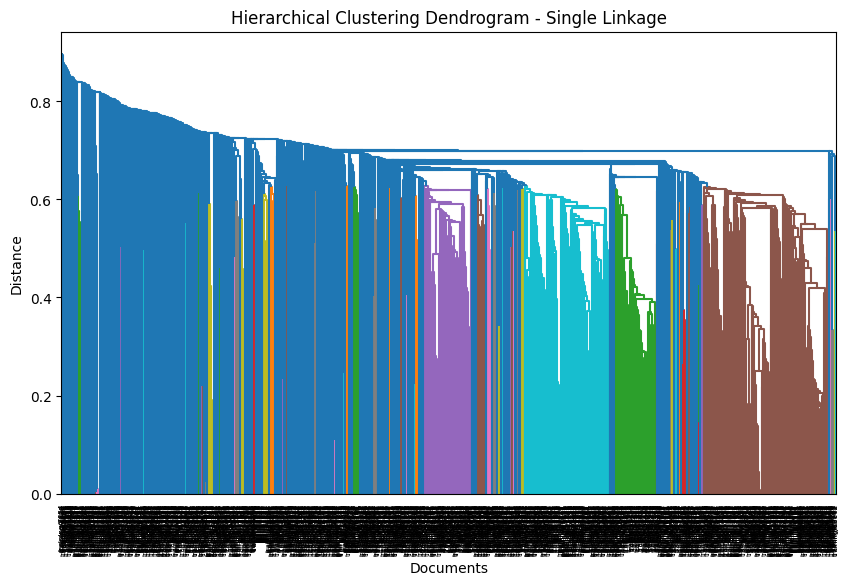

Single Linkage Rand Index: -0.0003


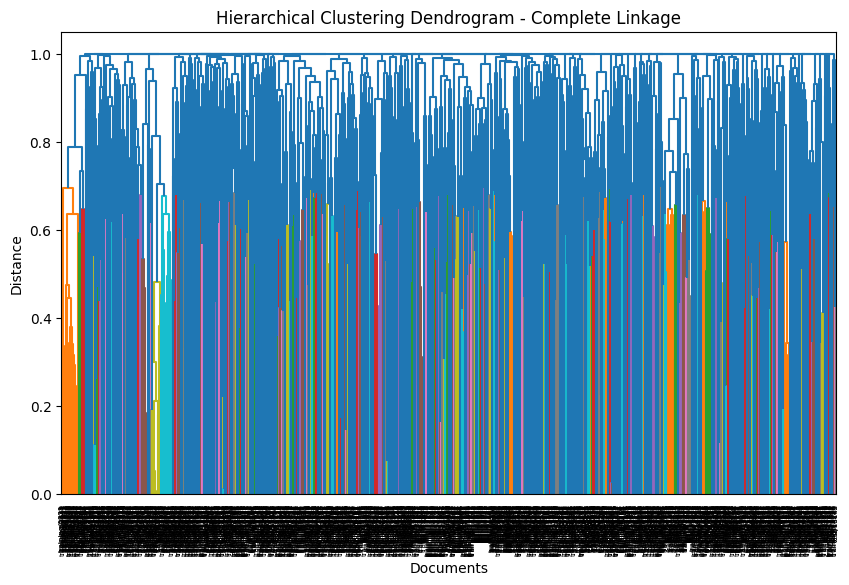

Complete Linkage Rand Index: 0.0000


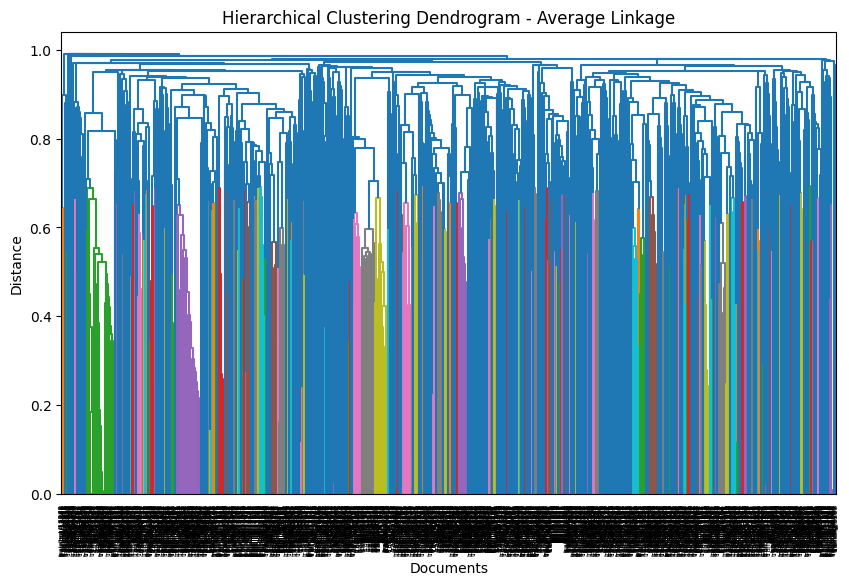

Average Linkage Rand Index: -0.0008


ValueError: Method 'centroid' requires the distance metric to be Euclidean

In [8]:
for method in linkage_methods:
    # Calculate linkage matrix
    linkage_matrix = linkage(tfidf_matrix.toarray(), method=method, metric='cosine')

    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=single_class_documents, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Documents')
    plt.ylabel('Distance')
    plt.show()

    # Cut dendrogram at the second branch from the top to obtain K=3 clusters
    clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')

    # Compute Rand index
    true_labels = [reuters.categories(doc_id)[0] for doc_id in single_class_documents]
    rand_index = adjusted_rand_score(true_labels, clusters)
    rand_indices[method] = rand_index

    print(f"{method.capitalize()} Linkage Rand Index: {rand_index:.4f}")

# Print Rand indices for each clustering method
print("\nRand Indices:")
for method, rand_index in rand_indices.items():
    print(f"{method.capitalize()} Linkage: {rand_index:.4f}")

# Identify the clustering method with the highest Rand index
best_method = max(rand_indices, key=rand_indices.get)
print(f"\nThe best clustering method is {best_method.capitalize()} Linkage.")

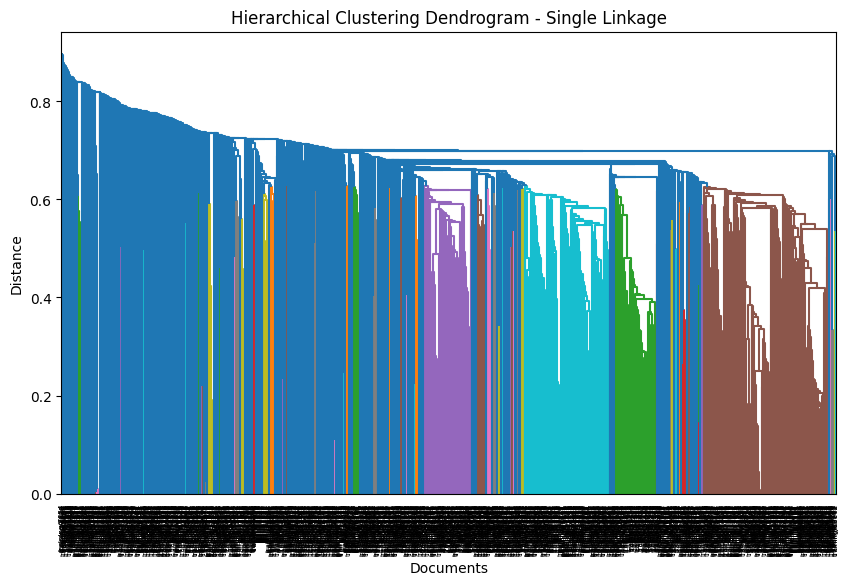

Single Linkage Rand Index: -0.0003


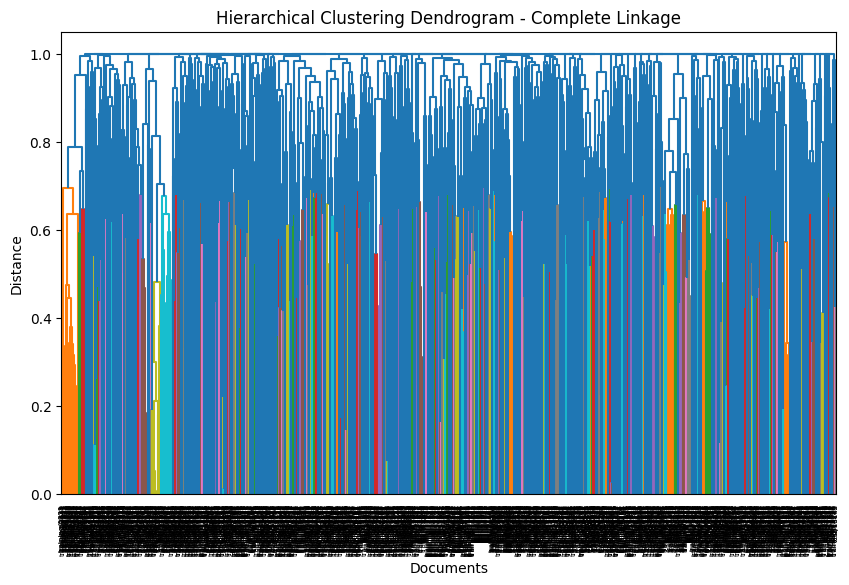

Complete Linkage Rand Index: 0.0000


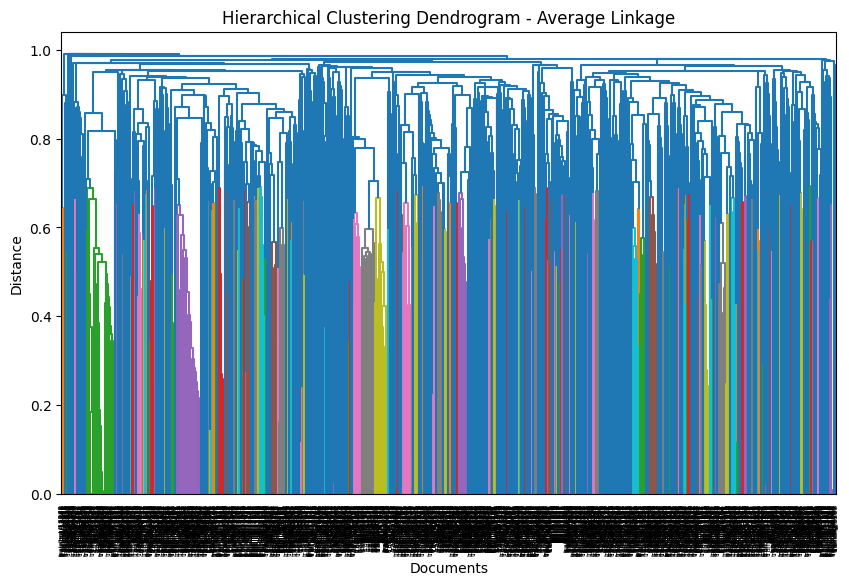

Average Linkage Rand Index: -0.0008


ValueError: ignored

In [ ]:
# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
rand_indices = {}

for method in linkage_methods:
    # Calculate linkage matrix
    linkage_matrix = linkage(tfidf_matrix.toarray(), method=method, metric='cosine')

    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=single_class_documents, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Documents')
    plt.ylabel('Distance')
    plt.show()

    # Cut dendrogram at the second branch from the top to obtain K=3 clusters
    clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')

    # Compute Rand index
    true_labels = [reuters.categories(doc_id)[0] for doc_id in single_class_documents]
    rand_index = adjusted_rand_score(true_labels, clusters)
    rand_indices[method] = rand_index

    print(f"{method.capitalize()} Linkage Rand Index: {rand_index:.4f}")

# Print Rand indices for each clustering method
print("\nRand Indices:")
for method, rand_index in rand_indices.items():
    print(f"{method.capitalize()} Linkage: {rand_index:.4f}")

# Identify the clustering method with the highest Rand index
best_method = max(rand_indices, key=rand_indices.get)
print(f"\nThe best clustering method is {best_method.capitalize()} Linkage.")

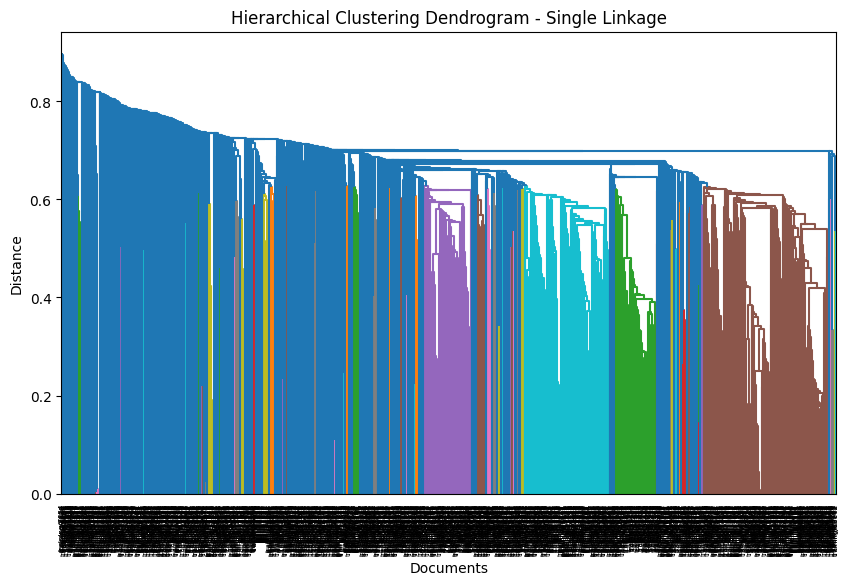

Single Linkage Rand Index: -0.0003


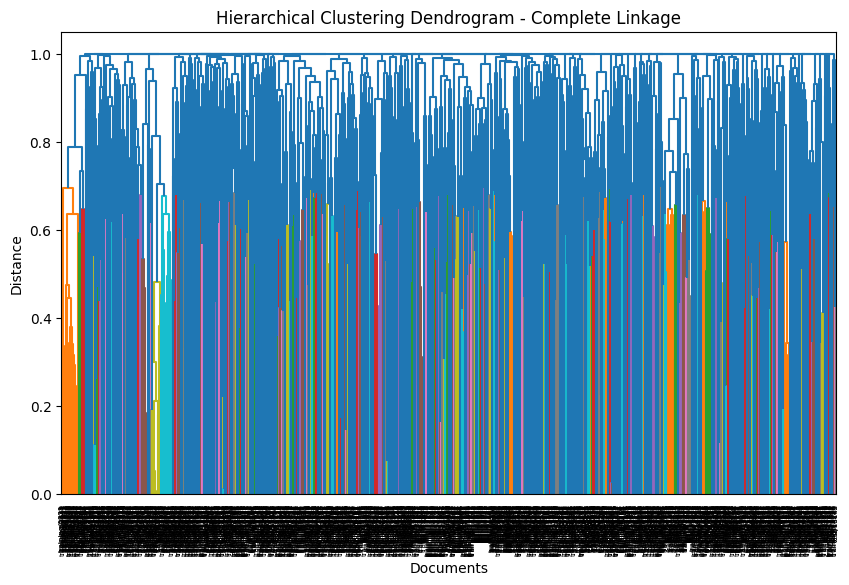

Complete Linkage Rand Index: 0.0000


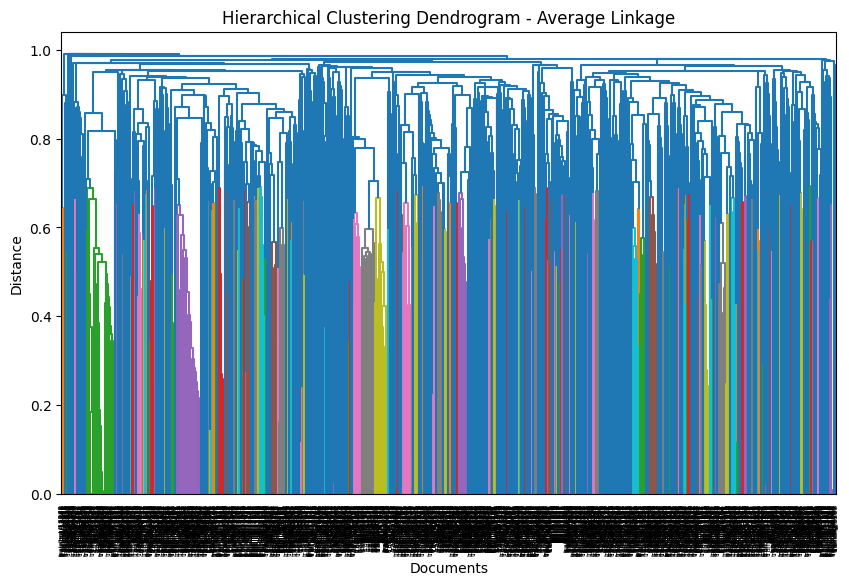

Average Linkage Rand Index: -0.0008


ValueError: Method 'centroid' requires the distance metric to be Euclidean

In [9]:
# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid']
rand_indices = {}

for method in linkage_methods:
    # Calculate linkage matrix
    linkage_matrix = linkage(tfidf_matrix.toarray(), method=method, metric='cosine')

    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=single_class_documents, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Documents')
    plt.ylabel('Distance')
    plt.show()

    # Cut dendrogram at the second branch from the top to obtain K=3 clusters
    clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')

    # Compute Rand index
    true_labels = [reuters.categories(doc_id)[0] for doc_id in single_class_documents]
    rand_index = adjusted_rand_score(true_labels, clusters)
    rand_indices[method] = rand_index

    print(f"{method.capitalize()} Linkage Rand Index: {rand_index:.4f}")

# Print Rand indices for each clustering method
print("\nRand Indices:")
for method, rand_index in rand_indices.items():
    print(f"{method.capitalize()} Linkage: {rand_index:.4f}")

# Identify the clustering method with the highest Rand index
best_method = max(rand_indices, key=rand_indices.get)
print(f"\nThe best clustering method is {best_method.capitalize()} Linkage.")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

In [ ]:
# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid']
rand_indices = {}

for method in linkage_methods:
    # Initialize hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)

    # Fit and predict clusters
    clusters = clustering.fit_predict(tfidf_matrix.toarray())

    # Compute Rand index
    true_labels = [reuters.categories(doc_id)[0] for doc_id in single_class_documents]
    rand_index = adjusted_rand_score(true_labels, clusters)
    rand_indices[method] = rand_index

    print(f"{method.capitalize()} Linkage Rand Index: {rand_index:.4f}")

# Print Rand indices for each clustering method
print("\nRand Indices:")
for method, rand_index in rand_indices.items():
    print(f"{method.capitalize()} Linkage: {rand_index:.4f}")

Single Linkage Rand Index: -0.0001
Complete Linkage Rand Index: 0.0264
Average Linkage Rand Index: -0.0011


InvalidParameterError: ignored

ValueError: ignored

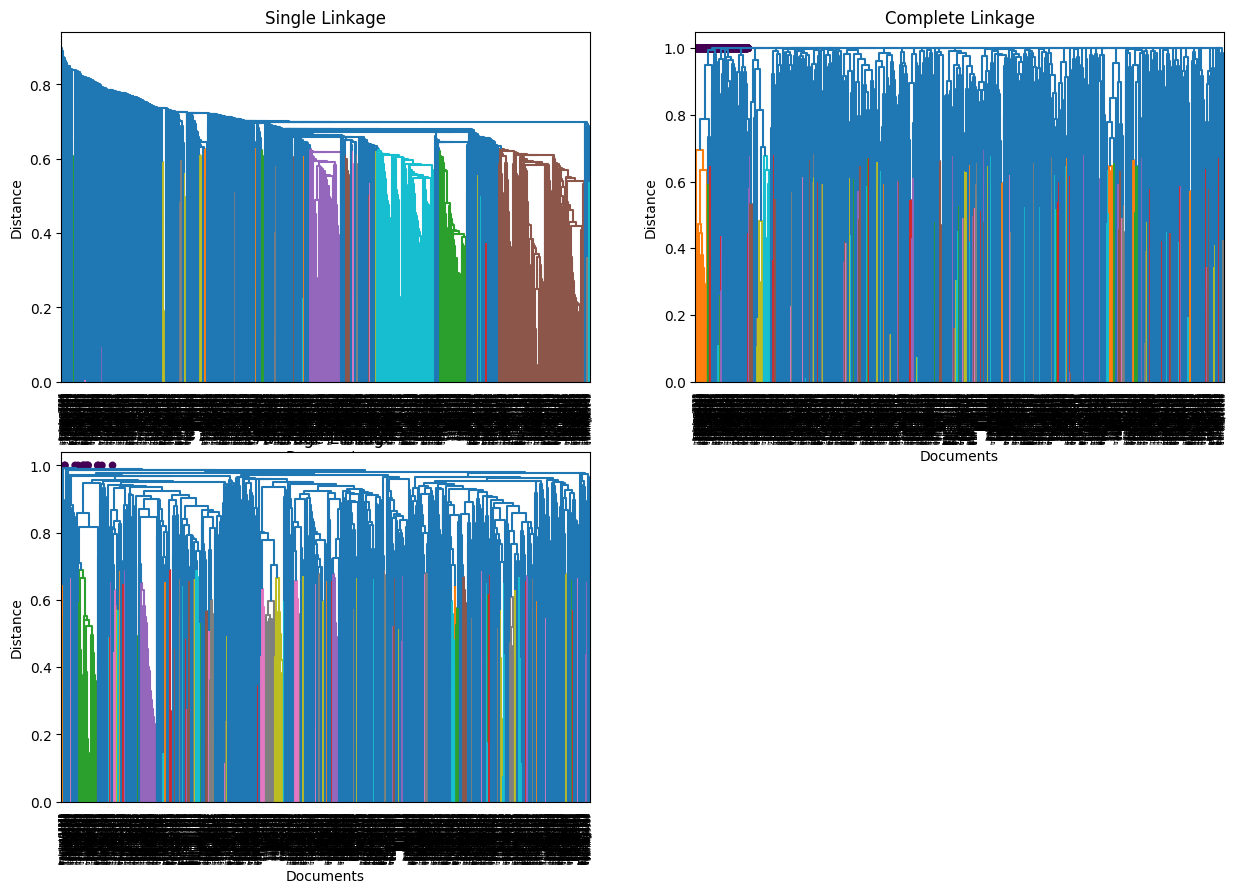

In [ ]:
# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, start=1):
    # Calculate linkage matrix
    linkage_matrix = linkage(tfidf_matrix.toarray(), method=method, metric='cosine')

    # Cut dendrogram at the second branch from the top to obtain K=3 clusters
    clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

    # Plot dendrogram
    plt.subplot(2, 2, i)
    dendrogram(linkage_matrix, labels=single_class_documents, leaf_rotation=90)
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Documents')
    plt.ylabel('Distance')

    # Plot clustering results
    plt.scatter(range(len(single_class_documents)), clusters, c=clusters, cmap='viridis', marker='o', s=20)

plt.tight_layout()
plt.show()